**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Skander SERSI

# Analyse de données - Meilleure tactique

## Partie 1 - Description du problème

On cherche à trouver la meilleure tactique en terme de positionnement de joueurs de l'équipe du PSG dans les matches à domicile.

## Partie 2 - Modèle

La base des matches du PSG depuis 2008 constitue notre modèle.

## Partie 3 - Code

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data_Matche = pd.read_csv("projet/match.csv")
dm = data_Matche.dropna(subset =['B365H','B365D','B365A','shoton','shotoff','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11','away_team_goal','home_team_goal'])
dm.head(-1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.50,12.00,1.30,4.75,10.00,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.00,13.00,1.22,5.50,13.00,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.80,1.65,5.00,3.40,1.70,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.50,4.35,1.91,3.25,4.00,1.91,3.25,3.80
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,3.40,2.05,3.30,4.00,2.00,3.25,3.75,2.00,3.25,3.50
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,2.20,3.20,3.40,2.30,3.00,3.25,2.30,2.80,3.25,2.30
1735,1736,1729,1729,2008/2009,1,2008-08-16 00:00:00,489049,8559,10194,3,...,4.33,1.85,3.40,4.80,1.83,3.25,4.50,1.80,3.25,4.33
1736,1737,1729,1729,2008/2009,1,2008-08-16 00:00:00,489050,8667,9879,2,...,2.75,2.60,3.40,2.80,2.60,3.25,2.60,2.60,3.25,2.50
1737,1738,1729,1729,2008/2009,1,2008-08-17 00:00:00,489051,8455,8462,4,...,10.00,1.33,5.00,11.00,1.33,4.75,9.00,1.33,4.20,10.00
1738,1739,1729,1729,2008/2009,10,2008-10-29 00:00:00,489132,10260,8654,2,...,17.00,1.20,6.10,19.00,1.20,6.00,13.00,1.22,5.50,12.00


In [4]:
#### Definition de la fonction winner
# return 0 si équipe à domicile is winner
# return 1 si équipe visiteur is winner
# return 2 si draw
def winner(dataframe):
    if dataframe["home_team_goal"].values[0] > dataframe["away_team_goal"].values[0]:
        return 0
    if dataframe["home_team_goal"].values[0] < dataframe["away_team_goal"].values[0]:
        return 1
    else:
        return 2

## Partie 4 - Protocole expérimental

In [5]:
#dm['home_player_Y11']
data_Team = pd.read_csv('projet/team.csv')
id_psg = data_Team.loc[data_Team['team_short_name'] == 'PSG'].values[0][1]
df_home = dm.loc[(dm['home_team_api_id'] == id_psg)]
df_gagnant = pd.DataFrame(columns = df_home.columns)
for i in df_home.index:
    if winner(df_home.loc[df_home.index == i]) == 0:
        df_gagnant = df_gagnant.append(df_home.loc[df_home.index == i])
## dataframe representant les rencontre gagnées par le psg, 
#df_gagnant

In [6]:
# On va chercher la tactique qui a donné le plus de success
home_team_squad_X = ['home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11']
home_team_squad_Y = ['home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11']
df_gagnant_home = df_gagnant.loc[(df_gagnant['home_team_api_id'] == id_psg)]
df_tactiques = pd.DataFrame()
df_tactiques_X = df_tactiques.append(pd.DataFrame(df_gagnant_home[home_team_squad_X]),ignore_index = True)
df_tactiques_Y = df_tactiques.append(pd.DataFrame(df_gagnant_home[home_team_squad_Y]),ignore_index = True)
x_list = list()
y_list = list()
#calcul des position les plus frequentes en X
for i in df_tactiques_X:
    x_list.append(df_tactiques_X[i].value_counts().idxmax())

#calcul des position les plus frequentes en Y
for i in df_tactiques_Y:
    y_list.append(df_tactiques_Y[i].value_counts().idxmax())


## Partie 5 - Résultats

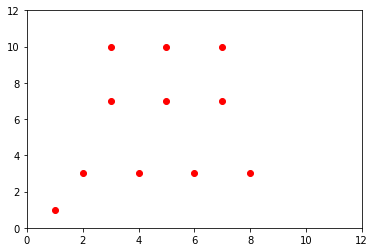

[1.0, 2.0, 4.0, 6.0, 8.0, 3.0, 5.0, 7.0, 3.0, 5.0, 7.0]
[1.0, 3.0, 3.0, 3.0, 3.0, 7.0, 7.0, 7.0, 10.0, 10.0, 10.0]


In [6]:
plt.plot(x_list,y_list, 'ro')
plt.axis([0, 12, 0, 12])
plt.show()
print(x_list)
print(y_list)

## Partie 6 - Analyse